In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.23.2 statsmodels==0.12.0


In [3]:
adata = sc.read('pre_combat_adata.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 49320 × 21283
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [5]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:01:34)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


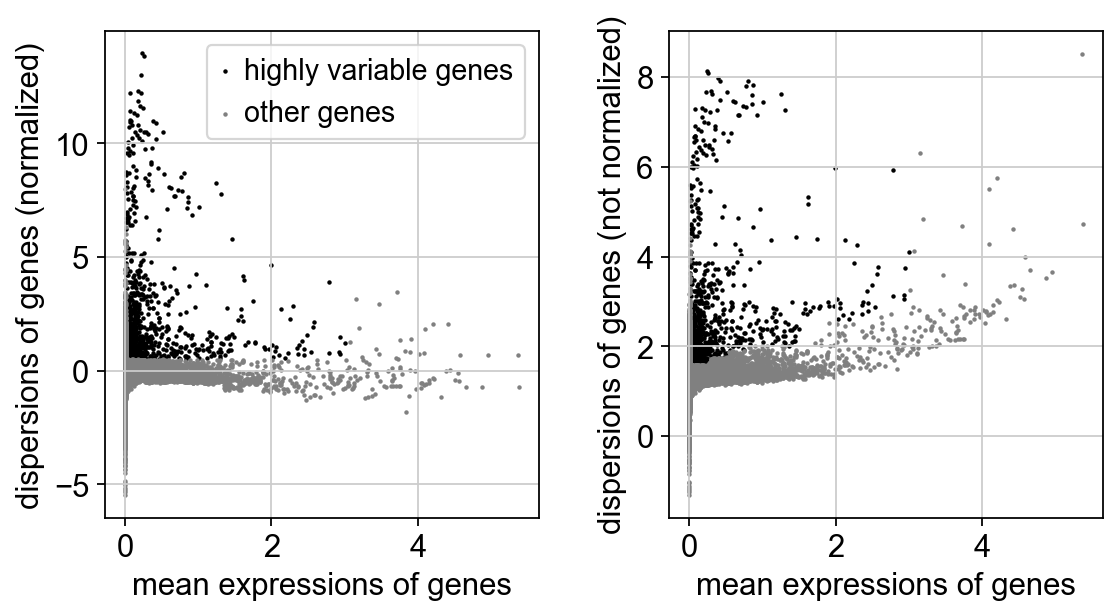

In [6]:
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

In [9]:
sc.pp.scale(adata, max_value=10)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
# PCA

sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:18)


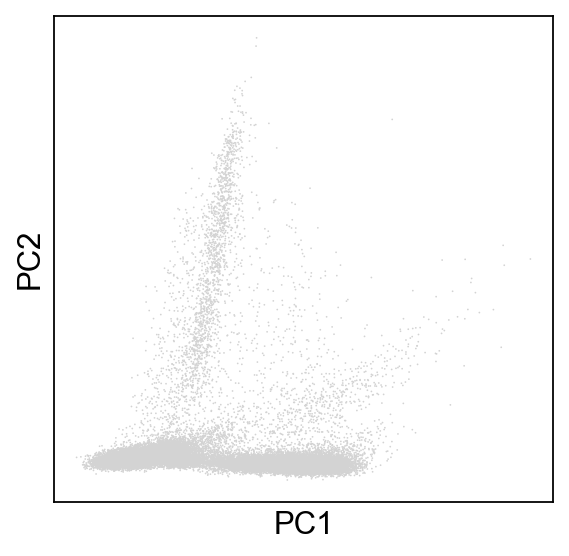

In [11]:
sc.pl.pca(adata)

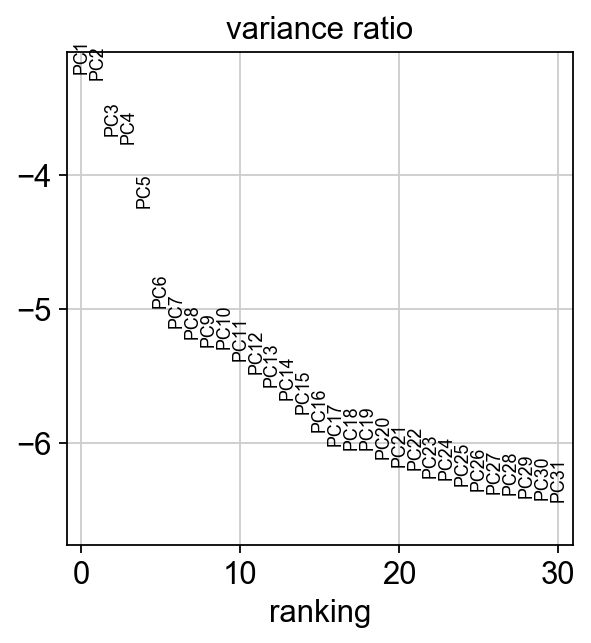

In [12]:
sc.pl.pca_variance_ratio(adata, log=True)

In [13]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [14]:
adata.write(results_file)

In [15]:
adata

AnnData object with n_obs × n_vars = 49320 × 1158
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [16]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:49)


In [17]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:01)


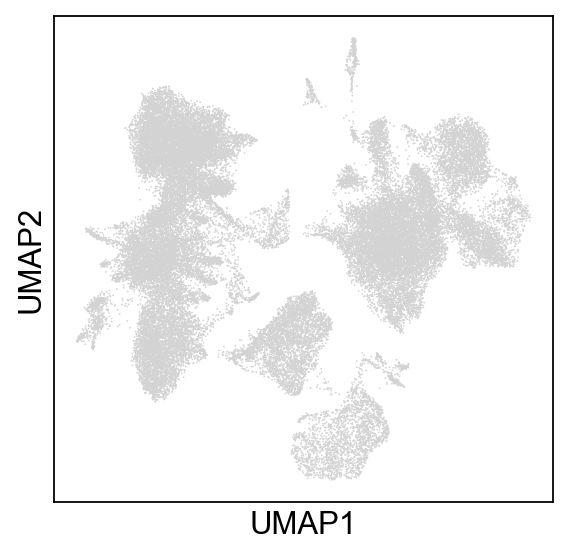

In [18]:
sc.pl.umap(adata)

In [20]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:32)


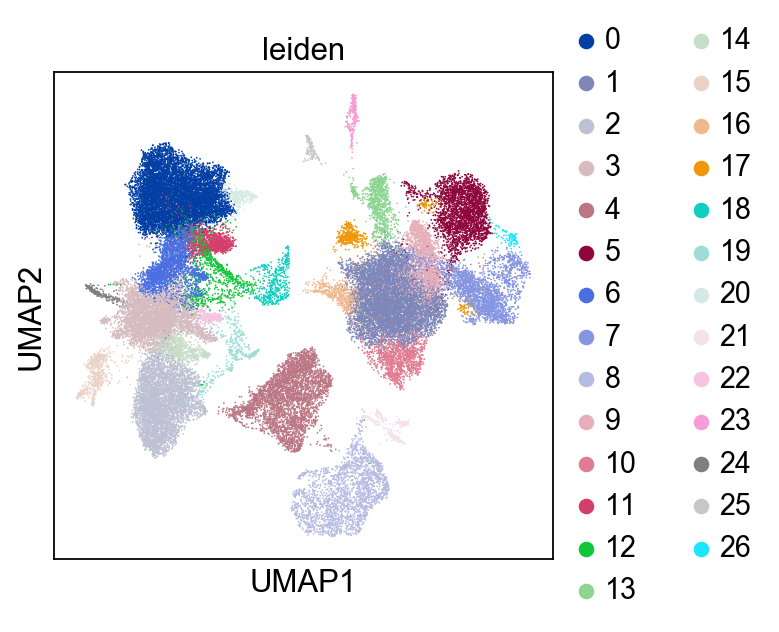

In [57]:
sc.pl.umap(adata, color=['leiden'])

In [54]:
adata.write('leiden.h5ad_nocompression.h5ad')

In [24]:
adata.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCTGAGACAAAGG-0-0,0,1722,1722,4549.0,303.0,6.660805,12
AAACCTGAGACCACGA-0-0,0,982,982,2162.0,195.0,9.019426,9
AAACCTGAGACGCACA-0-0,0,765,765,1889.0,107.0,5.664373,1
AAACCTGAGAGAGCTC-0-0,0,1004,1004,2472.0,150.0,6.067961,0
AAACCTGAGATCCGAG-0-0,0,413,413,573.0,42.0,7.329843,1
...,...,...,...,...,...,...,...
TTTGTCAGTCTGCGGT-3-3,3,929,929,2560.0,142.0,5.546875,0
TTTGTCAGTGTTCTTT-3-3,3,843,843,1847.0,84.0,4.547915,0
TTTGTCATCACTTATC-3-3,3,320,320,604.0,49.0,8.112582,18
TTTGTCATCGCGCCAA-3-3,3,1751,1751,4023.0,280.0,6.959980,1


In [27]:
adata.raw